
COMP 4447 Final Project 
Authors: Elizabeth Fugikawa & Heather Lemon 
10/05/2022

How online dating and dating apps affects U.S. demograhics *can change later*





**Love**. Love permeates many decisions we have in life. The motivation behind this analysis is to further understand the dynamics of love and dating using the data collected through [Standford's How Couples Meet and Stay Together (HCMST) 2017](https://data.stanford.edu/hcmst2017) [0].
Some details of the data collected include; poltical affilation, mother's highest level of education, demographics, and if you met your sigificant other online or not. 

We will looking at exploratory data analysis, feature engineering, cleaning, and visualization. Including basic transformations and normalizations of data.  

## Table of Contents
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.1 [Missing-Values](#Missing-Values) 
    * 1.2 [Basic Transformations](#Basic-Transformations)
    * 1.3 [Visualizing the Data](#Visualization-of-Data)
         * 1.2.1 [Seaborn PairPlot](#Seaborn-Pairplot)
         * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.4 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
    

# Importing Data

In [1]:
%%bash
# pull data from Stanford
wget 'https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip'
unzip HCMST_2017_public_data_v1.1_stata.zip
# remove zipped file
rm HCMST_2017_public_data_v1.1_stata.zip
# rename file
mv 'HCMST 2017 fresh sample for public sharing draft v1.1.dta' HCMST2017.dta


--2022-10-22 20:29:03--  https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463647 (453K) [application/zip]
Saving to: ‘HCMST_2017_public_data_v1.1_stata.zip’

     0K .......... .......... .......... .......... .......... 11%  585K 1s
    50K .......... .......... .......... .......... .......... 22%  626K 1s
   100K .......... .......... .......... .......... .......... 33%  953K 0s
   150K .......... .......... .......... .......... .......... 44% 1.02M 0s
   200K .......... .......... .......... .......... .......... 55% 6.52M 0s
   250K .......... .......... .......... .......... .......... 66% 1.09M 0s
   300K .......... .......... .......... .......... .......... 77% 1.51M 0s
   350K .......... .......... .......... .......... .......

Archive:  HCMST_2017_public_data_v1.1_stata.zip
  inflating: HCMST 2017 fresh sample for public sharing draft v1.1.dta  


# Exploratory Data Analysis

We begin by importing the proper libraries, files and taking a look at what we're dealing with;

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import logging
import seaborn as sns

# read sample 
df = pd.read_stata('HCMST2017.dta')
#df.info(verbose=True)
df.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


External Links: [0] https://data.stanford.edu/hcmst2017


id          int64
age         int64
cat_age    object
hhinc       int32
dtype: object


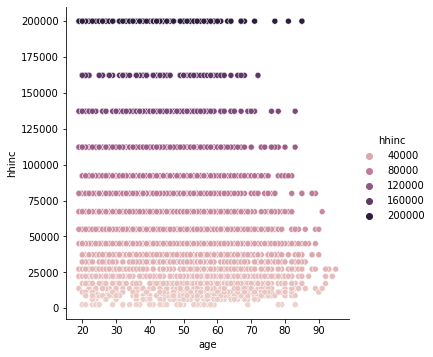

In [12]:

import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm


class Main:

    def __init__(self):
        self.df = pd.read_csv("HCMST.csv", low_memory=False)
        logging.info("loading csv as dataframe")
        self.df_numeric = pd.DataFrame()
        self.df_numeric_encoded = pd.DataFrame()
        self.df_categorical = pd.DataFrame()
        self.df_categorical_encoded = pd.DataFrame()

    def log_config(self) -> None:
        """
        setup logging config
        Return: None
        """
        logger = logging.getLogger()
        logger.setLevel(logging.ERROR)
        #TODO remove in final ipynb submission
        fh = logging.FileHandler("clean_data.log", "w")
        fh.setLevel(logging.INFO)
        logger.addHandler(fh)

        sh = logging.StreamHandler()
        sh.setLevel(logging.INFO)
        logger.addHandler(sh)

    def clean_data(self):
        logging.info(f"loading dataframe")
        # select only columns of interest
        self.df_numeric = self.df[['caseid_new', 'ppage', 'ppagecat', 'hhinc']].rename(
            {'caseid_new': 'id', 'ppage': 'age', 'ppagecat':'cat_age', 'papreligion':'religion'}, axis=1)
        self.df_categorical = self.df[['ppgender' , 'ppeducat', 'ppincimp', 'ppwork',
                                       'pppartyid3', 'ppreg9', 'ppmarit', 'q24_met_online', 'papreligion',
                                       'relationship_quality', 'w6_otherdate_app_2']].rename(
            columns={'ppgender': 'gender', 'ppagecat': 'agecat', 'ppeducat': 'educ', 'ppincimp': "incomecat",
                     'ppwork': 'job_status', 'pppartyid3': 'political_aff', 'ppreg9': 'region', 'papreligion':'religion', 'w6_otherdate_app_2': 'app_used',
                     'ppmarit': 'marital_status', 'q24_met_online': 'met_online'})
        self.df_numeric['hhinc'] = self.df_numeric['hhinc'].astype(int)
        self.df_numeric_encoded = pd.get_dummies(self.df_numeric)
        self.df_categorical_encoded = pd.get_dummies(self.df_categorical)
        # print(self.df_categorical_encoded.head())
        # print(self.df_numeric_encoded.head())
        # print(self.df_categorical_encoded.describe())
        # print(self.df_numeric_encoded.describe())
        # cleaning null
        # print(self.df_categorical.isnull().sum())
        # print(self.df_numeric.isnull().sum())
        print(self.df_numeric.dtypes)

    def gender(self):
        # Visualize gender representative
        female_count = self.df_categorical_encoded['gender_female'].value_counts()[
            self.df_categorical_encoded['gender_female'] == 1].values[0]
        male_count = self.df_categorical_encoded['gender_female'].value_counts()[
            self.df_categorical_encoded['gender_female'] == 1].values[1]
        gender = pd.DataFrame({'gender': ['female', 'male'], 'count': [female_count, male_count]})
        sns.barplot(x='gender', y='count', data=gender, palette='hls')
        plt.show()

    def political(self):
        # Visualize political representative
        democrat_count = self.df_categorical_encoded['political_aff_democrat'].value_counts()[1]
        republican_count = self.df_categorical_encoded['political_aff_republican'].value_counts()[1]
        other_count = self.df_categorical_encoded['political_aff_other'].value_counts()[1]
        party_aff = pd.DataFrame({'political_party': ['democrat', 'republican', 'other'],
                                  'count': [democrat_count, republican_count, other_count]})
        sns.barplot(x='political_party', y='count', data=party_aff, palette="hls")
        plt.xlabel('Political Party Affiliation')
        plt.ylabel('Count')
        plt.title('Political Party Affiliation Representation')
        plt.legend()
        plt.show()

    def pivot(self):
        logging.info("creating pivot tables")
        full_df = pd.concat([self.df_numeric, self.df_categorical], axis=1)
        t1 = full_df.pivot_table(values=["hhinc"], index=["region"], aggfunc=np.mean)
        # print(t1)
        t2 = full_df.pivot_table(values=["id"], index=["marital_status", "met_online"], aggfunc='count')
        # print(t2)
        t3 = full_df.pivot_table(values=["id"], index=["political_aff", "age"], aggfunc='count')
        print(t1)

        # interesting question, what season or month did you meet your significant other?
        # TODO: viz of map/region, pull month met data, pairpolt, (ggqqplot) normalize plot for numeric values
        # income, pivot_tables, regplot, avg age vs income, missing data?

    def age(self):
        age_col_df = self.df_numeric_encoded.iloc[2:, :10]
        age_col_df.drop(labels='id', axis=1, inplace=True)
        age_col_df.drop(labels='age', axis=1, inplace=True)
        age_col_df.drop(labels='hhinc', axis=1, inplace=True)
        count_df = pd.DataFrame({'count': age_col_df.sum()})
        count_df.rename(index={'cat_age_18-24': '18-24', 'cat_age_25-34': '25-34',
                               'cat_age_35-44': '35-44', 'cat_age_45-54': '45-54',
                               'cat_age_55-64': '55-64', 'cat_age_65-74': '65-74',
                               'cat_age_75+': '75+'}, inplace=True)
        count_df.reset_index(inplace=True)
        count_df.rename(columns={'index': 'age'}, inplace=True)
        sns.barplot(x='age', y='count', data=count_df, palette='hls')
        plt.show()

    def pair(self):
        """
        plot pairwise relationships
        """
        sns.pairplot(self.df_numeric, x_vars=['age'], y_vars=['hhinc'], pale hue='hhinc', height=5)
        plt.show()


if __name__ == '__main__':
    m = Main()
    m.log_config()
    m.clean_data()
#     m.gender()
#     m.political()
#     m.pivot()
#     m.age()
#     sm.MANOVA
#     sm.OLS()
    m.pair()
